In [145]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF
from scipy.stats import pearsonr
%matplotlib inline

In [81]:
train_path = 'C://Users//lenovo//Desktop//Docs//ZS//dataset'
os.chdir(train_path)
train = pd.read_csv('yds_train2018.csv')
test = pd.read_csv('yds_test2018.csv')
promotional_expense = pd.read_csv('promotional_expense.csv')
holidays = pd.read_excel('holidays.xlsx', sheet_name = None)
sample = pd.read_csv('sample_submission.csv')

In [82]:
train[(train['Month'] == 5) & (train['Year'] == 2014) & train['Country'].str.contains('Argentina')]['Product_ID'].unique()

array([1, 2], dtype=int64)

In [83]:
promotional_expense['Product_Type'].unique()

array([1, 2, 4, 5], dtype=int64)

In [84]:
train['Product_ID'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [95]:
groupedid = train.groupby(['Year', 'Month', 'Country', 'Product_ID'], as_index = False)['Sales'].sum()

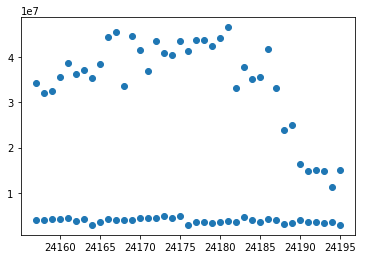

In [110]:
temp = groupedid.loc[groupedid['Product_ID'] == 1]
plt.scatter(temp['Year'] * 12 + temp['Month'] , temp['Sales'])

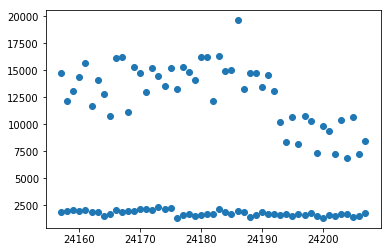

In [106]:
temp2 = promotional_expense.loc[promotional_expense['Product_Type'] == 1]
plt.scatter(temp2['Year'] * 12 + temp2['Month'], temp2['Expense_Price'])

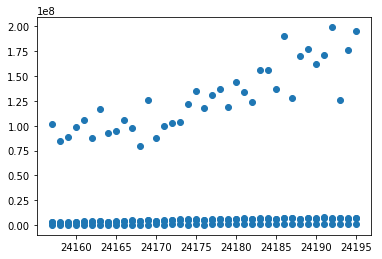

In [107]:
temp = groupedid.loc[groupedid['Product_ID'] == 2]
plt.scatter(temp['Year'] * 12 + temp['Month'] , temp['Sales'])

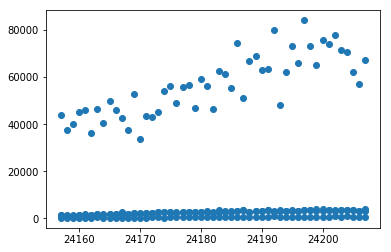

In [108]:
temp2 = promotional_expense.loc[promotional_expense['Product_Type'] == 2]
plt.scatter(temp2['Year'] * 12 + temp2['Month'], temp2['Expense_Price'])

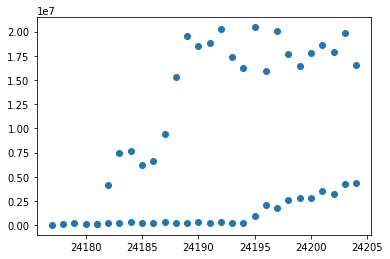

In [112]:
temp = groupedid.loc[groupedid['Product_ID'] == 3]
plt.scatter(temp['Year'] * 12 + temp['Month'] , temp['Sales'])

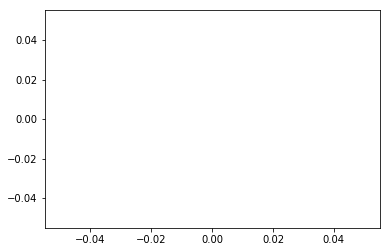

In [115]:
temp2 = promotional_expense.loc[promotional_expense['Product_Type'] == 3]
plt.scatter(temp2['Year'] * 12 + temp2['Month'], temp2['Expense_Price'])

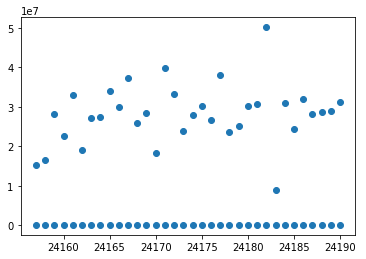

In [116]:
temp = groupedid.loc[groupedid['Product_ID'] == 4]
plt.scatter(temp['Year'] * 12 + temp['Month'] , temp['Sales'])

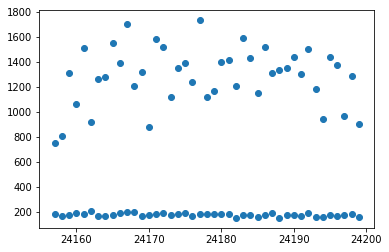

In [118]:
temp2 = promotional_expense.loc[promotional_expense['Product_Type'] == 4]
plt.scatter(temp2['Year'] * 12 + temp2['Month'], temp2['Expense_Price'])

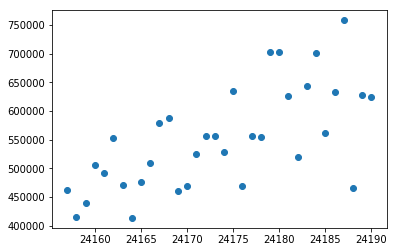

In [120]:
temp = groupedid.loc[groupedid['Product_ID'] == 5]
plt.scatter(temp['Year'] * 12 + temp['Month'] , temp['Sales'])

In [ ]:
temp2 = promotional_expense.loc[promotional_expense['Product_Type'] == 5]
plt.scatter(temp2['Year'] * 12 + temp2['Month'], temp2['Expense_Price'])

We get the following mapping:<br>
<table>
    <tr>
        <td><b> product id</b> </td>  <td> <b> product type </b> </td>
    </tr>
    <tr>
        <td> 1 </td> <td> 1</td>
    </tr>
    <tr>
        <td> 2 </td> <td> 2 </td>
    <tr>
        <td> 3 </td> <td> 1 </td>
    </tr>
    <tr>
        <td> 4 </td> <td> 4 </td>
    </tr>
    <tr>
        <td> 5 </td> <td> 5 </td>
    </tr>
</table>

In [147]:
train.loc[train['Product_ID'] == 3].groupby(['Year', 'Month', 'Country'],as_index = False)['Sales'].sum()['Sales']

0        22459.60
1       161523.85
2       175611.00
3       151235.65
4       126000.00
5       159065.70
6      4180050.00
7       213032.10
8      7437150.00
9       214405.45
10     7626150.00
11      289779.20
12     6189750.00
13      269092.15
14     6611850.00
15      263377.45
16     9405900.00
17      272259.75
18    15353100.00
19      184946.75
20    19533150.00
21      239002.10
22    18515700.00
23      276301.70
24    18802350.00
25      187704.30
26    20257650.00
27      282780.10
28    17375400.00
29      253521.00
30    16280775.00
31      228392.80
32    20441925.00
33      930756.55
34    15893325.00
35     2065856.85
36    20074950.00
37     1806626.80
38    17676225.00
39     2587822.25
40    16461900.00
41     2790065.35
42    17821125.00
43     2781916.00
44    18586575.00
45     3572224.10
46    17909325.00
47     3196697.40
48    19826100.00
49     4263236.55
50    16550100.00
51     4351764.90
Name: Sales, dtype: float64

In [1]:
X

NameError: name 'X' is not defined

In [142]:
promotional_expense.groupby(['Year', 'Month', 'Country'], as_index = False)['Expense_Price'].sum()

,Year,Month,Country,Expense_Price
0,2013,1,Argentina,16078.681
1,2013,1,Belgium,249.590
2,2013,1,Columbia,3329.848
3,2013,1,Denmark,43843.906
4,2013,1,England,513.849
5,2013,1,Finland,750.618
6,2013,2,Argentina,13502.572
7,2013,2,Belgium,309.340
8,2013,2,Columbia,3228.781
9,2013,2,Denmark,37731.350


In [164]:
for i in range(1, 6):
    training_cat = train.loc[train['Product_ID'] == 3].groupby(['Year', 'Month', 'Country'],as_index = False)['Sales'].sum()['Sales']
    categ = promotional_expense.loc[promotional_expense['Product_Type'] == i].groupby(['Year', 'Month', 'Country'],as_index = False)['Expense_Price'].sum()['Expense_Price']
    print(i)
    min_size = min(len(training_cat), len(categ))
    print(pearsonr(training_cat[:min_size], categ[:min_size])[0])

1
0.800256179793
2
-0.409664806495
3
nan
4
-0.733819118747
5
0.388557013285


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


Highest positive correlation is between 1 and 3 <br>
3 product id belongs to 1 categry

In [ ]:
train

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.00
1,2,2013,1,1,ar00003,1,Argentina,39375.00
2,3,2013,1,1,ar00004,1,Argentina,15750.00
3,4,2013,1,1,ar00007,1,Argentina,47250.00
4,5,2013,1,1,ar00008,1,Argentina,283500.00
5,6,2013,1,1,ar000011,1,Argentina,0.00
6,7,2013,1,1,ar000021,1,Argentina,1575.00
7,8,2013,1,1,ar000023,1,Argentina,47250.00
8,9,2013,1,1,ar000027,1,Argentina,0.00
9,10,2013,1,1,ar000038,1,Argentina,0.00
